In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("secom_imputation.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v90,v91,v92,v93,v94,v95,v96,v98,v99,Pass/Fail
0,3030.93,2564.00,-0.003400,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0
1,3095.78,2465.14,-0.014800,-0.0004,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,...,8407.029900,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,-0.9353,-0.0158,0
2,2932.61,2559.94,0.001300,0.0006,-0.0001,0.0134,-0.0026,-0.0016,-0.0006,0.0013,...,9317.169800,0.0553,0.0006,-0.0013,0.0000,0.0002,-0.1343,-0.1427,0.1218,1
3,2988.72,2479.90,-0.003300,-0.0002,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,...,8205.700000,0.0697,-0.0003,-0.0021,-0.0001,0.0002,0.0411,0.0177,-0.0195,0
4,3032.24,2502.87,-0.007200,0.0004,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,...,9014.460000,0.0448,-0.0077,-0.0001,-0.0001,-0.0001,0.2189,-0.6704,-0.0167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,-0.005700,0.0000,0.0000,-0.0988,-0.0094,-0.0012,-0.0002,-0.0011,...,9201.720100,0.1671,0.0002,0.0011,0.0000,0.0000,-0.0382,0.0730,0.0884,0
1563,3052.31,2522.55,-0.009300,-0.0004,0.0002,0.0855,-0.0116,0.0005,0.0055,-0.0026,...,8624.859900,-0.3570,-0.0055,0.0026,0.0000,0.0001,-0.0821,0.4289,-0.0372,0
1564,2978.81,2379.78,0.000286,-0.0001,-0.0002,0.0022,-0.0142,0.0002,-0.0033,0.0001,...,8992.670200,-0.0223,0.0034,-0.0001,-0.0002,0.0000,0.2516,-0.4311,-0.0177,0
1565,2894.92,2532.01,0.003200,0.0004,0.0000,-0.1165,-0.0087,-0.0019,0.0036,0.0035,...,8817.088726,0.1759,-0.0036,-0.0034,0.0000,0.0001,-0.0926,-0.1023,0.1451,0


In [4]:
Fail_df = df[df['Pass/Fail'] == 1]
Pass_df =df[df['Pass/Fail'] == 0]

In [5]:
list_col = list(df.columns)

list_col.remove('Pass/Fail')

In [6]:
list_col

['v0',
 'v1',
 'v10',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v11',
 'v112',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v118',
 'v119',
 'v12',
 'v120',
 'v121',
 'v122',
 'v123',
 'v124',
 'v125',
 'v126',
 'v127',
 'v128',
 'v129',
 'v130',
 'v131',
 'v132',
 'v133',
 'v134',
 'v135',
 'v136',
 'v137',
 'v138',
 'v139',
 'v14',
 'v140',
 'v142',
 'v143',
 'v144',
 'v145',
 'v146',
 'v147',
 'v148',
 'v15',
 'v150',
 'v151',
 'v152',
 'v153',
 'v154',
 'v155',
 'v156',
 'v158',
 'v159',
 'v16',
 'v160',
 'v161',
 'v162',
 'v163',
 'v164',
 'v165',
 'v166',
 'v167',
 'v168',
 'v169',
 'v17',
 'v170',
 'v171',
 'v172',
 'v173',
 'v174',
 'v175',
 'v176',
 'v177',
 'v18',
 'v180',
 'v181',
 'v182',
 'v183',
 'v184',
 'v185',
 'v187',
 'v188',
 'v19',
 'v195',
 'v196',
 'v197',
 'v198',
 'v199',
 'v2',
 'v20',
 'v200',
 'v201',
 'v202',
 'v203',
 'v204',
 'v205',
 'v206',
 'v207',
 'v208',
 'v209',
 'v21',
 'v210',
 'v211',
 'v212',
 'v213',


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(26,15)

fig.set_size_inches((35,22))
for var, subplot in zip(list_col,ax.flatten()):
  #sns.distplot(df_3.loc[df_3[df_3.columns[i]].notnull(), df_3.columns[i]])
  #df_3.loc[df_3[var].notnull().hist(edgecolor='black' ,ax=subplot)
  
  #Pass_df[var].hist(edgecolor='black',ax=subplot)
    Pass_df[var].plot(kind='hist',ax=subplot, title=var, edgecolor='black')

# fig, ax = plt.subplots(1,3, figsize=(14,6))
# for var, subplot in zip(['ownerChange','sido','instkind'], ax.flatten()):
#     final_data.groupby([var,'OC'])['OC'].count().unstack('OC').plot(kind='bar', ax=subplot)
#     fig.tight_layout()
#      plt.show()

Error in callback <function flush_figures at 0x000002B2E6D01D38> (for post_execute):


KeyboardInterrupt: 

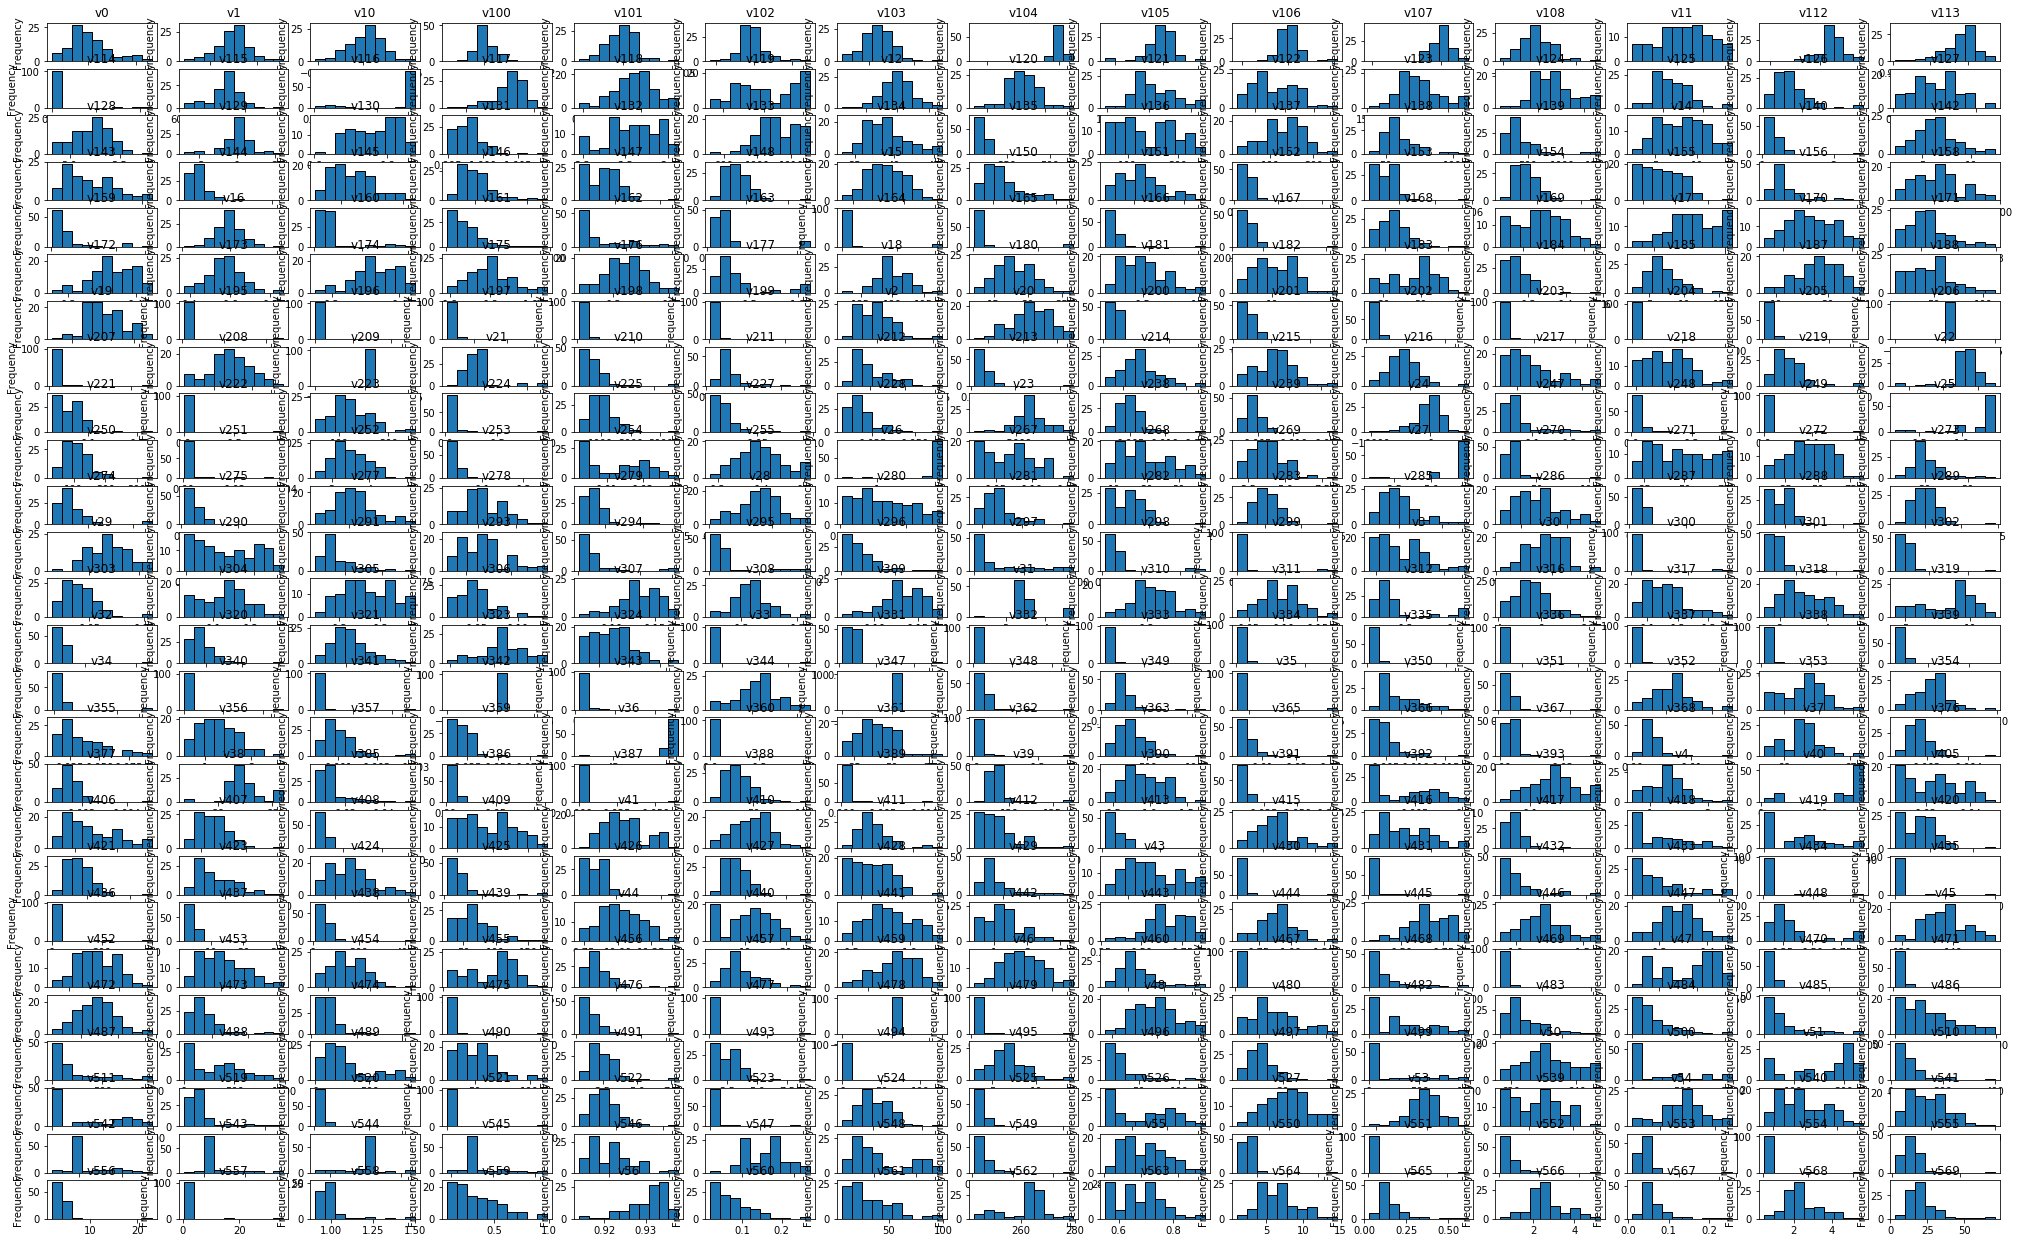

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(26,15)

fig.set_size_inches((35,22))
for var, subplot in zip(list_col,ax.flatten()):
  #sns.distplot(df_3.loc[df_3[df_3.columns[i]].notnull(), df_3.columns[i]])
  #df_3.loc[df_3[var].notnull().hist(edgecolor='black' ,ax=subplot)
  
  #Pass_df[var].hist(edgecolor='black',ax=subplot)
    Fail_df[var].plot(kind='hist',ax=subplot, title=var, edgecolor='black')

# fig, ax = plt.subplots(1,3, figsize=(14,6))
# for var, subplot in zip(['ownerChange','sido','instkind'], ax.flatten()):
#     final_data.groupby([var,'OC'])['OC'].count().unstack('OC').plot(kind='bar', ax=subplot)
#     fig.tight_layout()
#      plt.show()

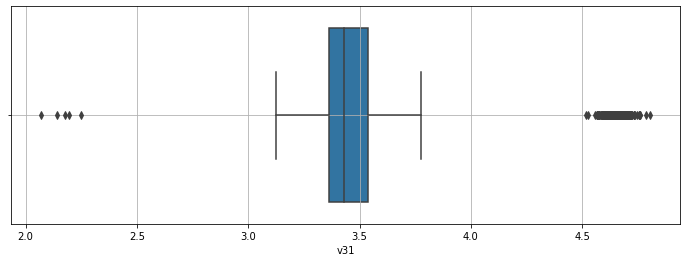

In [7]:
plt.figure(figsize=(12,4))
sns.boxplot(Pass_df['v31'])
plt.grid()
plt.show()

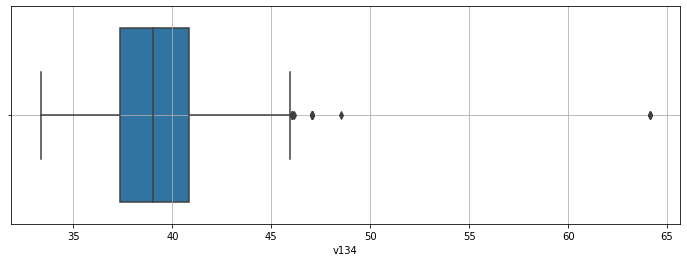

In [18]:
plt.figure(figsize=(12,4))
sns.boxplot(Pass_df['v134'])
plt.grid()
plt.show()

In [17]:
a = Pass_df['v134']
weight = 2.0
quantile_25 = np.percentile(a.values, 25)
quantile_75 = np.percentile(a.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * weight
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)

len(outlier_index)

5

In [8]:
a = Pass_df['v31']
weight = 2.0
quantile_25 = np.percentile(a.values, 25)
quantile_75 = np.percentile(a.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * weight
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)

len(outlier_index)

339

## 이상치 보정

In [9]:
over10percent_result = [] # 아웃라이어의 개수가 15%이상 넘는 피쳐이름과 그 개수 담으려구 만든 리스트
total_cell_number = 0 

In [10]:
import numpy as np

def outlier_change(df, weight_val, over15_li, border_num):
    for i in range(0, len(list(df.columns))):

        a = df[list(df.columns)[i]]
        weight = weight_val
        quantile_25 = np.percentile(a.values, 25)
        quantile_75 = np.percentile(a.values, 75)
        median=np.percentile(a.values, 50)

        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight

        outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)
        lowest_index = list(a[(a<lowest_val)].index)
        highest_index= list(a[(a>highest_val)].index)

        # 만약, 아웃라이어 값이 존재한다면
        if(len(outlier_index) != 0) : 

            # (코드 추가) 전체 아웃라이어 개수 셀단위로 몇 개인지 세어보기
            global total_cell_number # 전역변수 변경하는거라 앞에 global 반드시 붙여줘야함
            total_cell_number += len(outlier_index)

            # (코드 추가) 만약 아웃라이어가 15%이상의 비율을 차지할 경우 : border_num
            if(len(outlier_index) >=  border_num): 
                over15_li.append(list(df.columns)[i]) # 피쳐 이름추가
                over15_li.append(len(outlier_index))  # 이어서, 개수 추가
            else:
                for index in range(0, len(lowest_index)):
                    df.loc[[lowest_index[index]],[list(df.columns)[i]]] = median
                
                for  index in range(0, len(highest_index)):
                    df.loc[[ highest_index[index]],[list(df.columns)[i]]] =  median

In [11]:
outlier_change(Pass_df,1.5,over10percent_result,1463*0.01)

In [12]:
over10percent_result

['v0',
 50,
 'v1',
 81,
 'v10',
 30,
 'v100',
 31,
 'v101',
 60,
 'v102',
 58,
 'v103',
 31,
 'v104',
 41,
 'v105',
 78,
 'v106',
 106,
 'v107',
 58,
 'v108',
 40,
 'v112',
 135,
 'v113',
 33,
 'v114',
 19,
 'v115',
 52,
 'v116',
 176,
 'v117',
 73,
 'v118',
 30,
 'v120',
 45,
 'v121',
 24,
 'v122',
 23,
 'v125',
 41,
 'v126',
 43,
 'v127',
 20,
 'v128',
 40,
 'v129',
 224,
 'v133',
 25,
 'v134',
 24,
 'v135',
 59,
 'v138',
 86,
 'v139',
 86,
 'v140',
 54,
 'v142',
 58,
 'v143',
 36,
 'v144',
 116,
 'v145',
 71,
 'v146',
 77,
 'v150',
 50,
 'v151',
 27,
 'v152',
 124,
 'v153',
 16,
 'v155',
 76,
 'v156',
 55,
 'v159',
 118,
 'v16',
 32,
 'v160',
 60,
 'v161',
 129,
 'v162',
 152,
 'v163',
 49,
 'v164',
 53,
 'v165',
 40,
 'v166',
 50,
 'v167',
 19,
 'v168',
 21,
 'v17',
 21,
 'v171',
 78,
 'v173',
 34,
 'v175',
 30,
 'v177',
 214,
 'v184',
 42,
 'v185',
 41,
 'v19',
 46,
 'v195',
 192,
 'v196',
 61,
 'v197',
 44,
 'v198',
 24,
 'v199',
 161,
 'v2',
 29,
 'v20',
 29,
 'v200',
 19,
 'v20

In [13]:
total_cell_number

22735

In [17]:
final_data = pd.concat([Pass_df,Fail_df], axis = 0)

In [18]:
final_data

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v90,v91,v92,v93,v94,v95,v96,v98,v99,Pass/Fail
0,3030.93,2564.00,-0.0034,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0
1,3095.78,2465.14,-0.0148,-0.0004,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,...,8407.029900,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,-0.9353,-0.0158,0
3,2988.72,2479.90,-0.0033,-0.0002,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,...,8205.700000,0.0697,-0.0003,-0.0021,-0.0001,0.0002,0.0411,0.0177,-0.0195,0
4,3032.24,2502.87,-0.0072,0.0004,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,...,9014.460000,0.0448,-0.0077,-0.0001,-0.0001,-0.0001,0.2189,-0.6704,-0.0167,0
5,2946.25,2432.84,0.0055,-0.0002,-0.0001,0.0265,-0.0052,0.0006,-0.0008,0.0004,...,7869.700000,-0.1130,0.0009,-0.0004,-0.0002,0.0001,0.1925,-0.2240,-0.0419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2988.39,2493.72,0.0001,0.0002,-0.0002,0.0527,-0.0108,0.0005,-0.0007,-0.0009,...,9166.900100,-0.1869,0.0007,0.0009,-0.0002,0.0001,0.1763,-0.4620,-0.0344,1
1400,3052.98,2515.51,-0.0058,0.0010,-0.0002,-0.0440,-0.0063,0.0005,0.0005,-0.0010,...,8615.350100,0.0116,-0.0005,0.0010,0.0001,0.0001,-0.1473,-0.3505,-0.0400,1
1438,2951.84,2477.13,-0.0039,0.0000,-0.0001,-0.0237,-0.0114,-0.0004,-0.0005,0.0013,...,8862.260100,0.1514,0.0005,-0.0013,-0.0001,0.0001,0.1616,-0.3247,0.0298,1
1443,3173.18,2428.64,-0.0057,0.0003,0.0000,0.0382,-0.0086,-0.0006,-0.0018,0.0019,...,8817.088726,-0.1570,0.0019,-0.0019,0.0000,0.0001,-0.0722,-0.0724,0.0409,1


In [19]:
final_data.to_csv("secom_final.csv")